In [3]:
# List of soil moisture datatypes
soil_moisture_datatypes = [
    37, 38, 40, 542, 664, 665, 666, 667
]


Fetching data for USDA_SMAP_Soil_Moisture_Profile [37]
Request submitted 
ID = 2c514825-22f0-4803-b3b4-92e2885b959a
7.3%
29.3%
58.7%
84.3%
100.0%
Data retrieved successfully.
NaN values in raw_value: 0
Min value in raw_value: 0.1058778166770935
Max value in raw_value: 0.9970735311508179

Fetching data for USDA_SMAP_Surface_Soil_Moisture [38]
Request submitted 
ID = 16d1ae50-81fb-42a2-9d2e-872977a97e48
3.7%
33.0%
51.3%
80.7%
100.0%
Data retrieved successfully.
NaN values in raw_value: 0
Min value in raw_value: 0.03437037944793701
Max value in raw_value: 0.25329648971557617

Fetching data for USDA_SMAP_Sub_Surface_Soil_Moisture [40]
Request submitted 
ID = 95a17bdf-82d2-473a-84e0-e4dd954bf26f
3.7%
29.3%
55.0%
84.3%
100.0%
Data retrieved successfully.
NaN values in raw_value: 0
Min value in raw_value: 0.11789120674133301
Max value in raw_value: 1.134923553466797

Fetching data for NSIDC_SMAP_Sentinel_1Km_15_day [542]
Request submitted 
ID = ff695891-8676-4a69-ad6f-349110920d1e
4.3%
25.6%

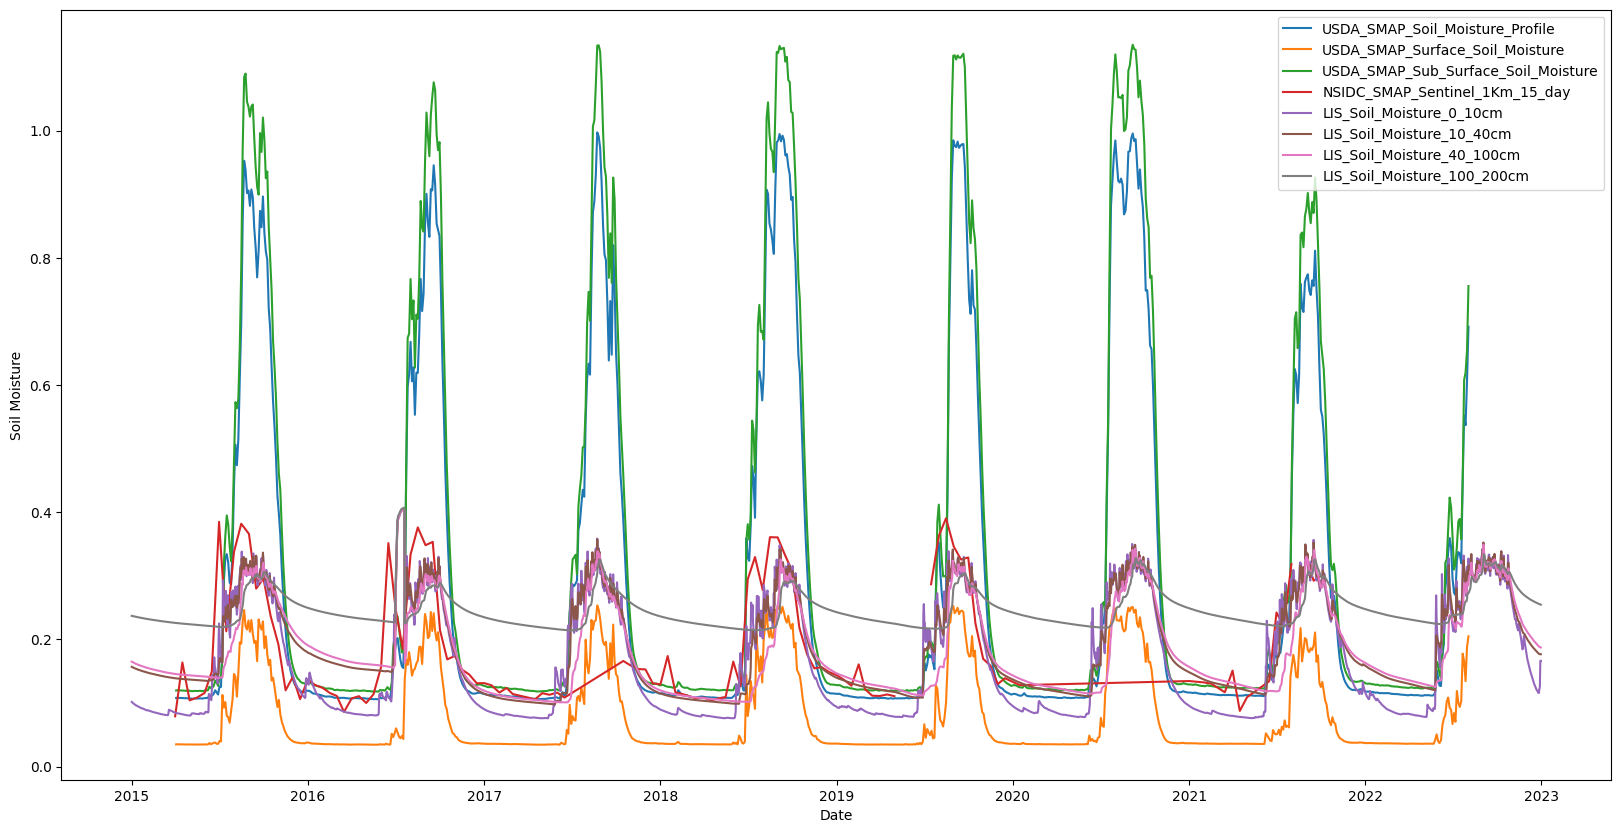

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from climateservaccess import getClimateservData, datatypeDict


def check_list(type_name): # check if the list is empty, has one value or multiple values
    type_list = df[type_name].unique().tolist()
    if len(type_list) == 0:
        return None
    elif len(type_list) == 1:
        return float(type_list[0])
    else:
        print(f"Multiple {type_name} found: {type_list}")
        return type_list

# Plot data for each datatype on the same graph
plt.figure(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Soil Moisture')

for type_num in soil_moisture_datatypes:

    print(f"\nFetching data for {datatypeDict[type_num]} [{type_num}]")
    
    gambia_box = [[-16.85, 13.85], [-16.85, 13.05], [-13.78, 13.05], [-13.78, 13.85], [-16.85, 13.85]]
    df = getClimateservData(type_num, '01/01/2015', '12/31/2022', 1, 5, gambia_box)

    temp_data = pd.DataFrame(df['datatype'].to_list())
        
    # find all unique values in the column and convert to list
    datatype = check_list('datatype')
    operationtype = check_list('operationtype')
    intervaltype = check_list('intervaltype')

    # create a dictionary with key as column name and values as list of unique values in the column
    params = {'datatype': datatype, 'operationtype': operationtype, 'intervaltype': intervaltype}

    # Select data from df
    temp_data = pd.DataFrame(df['data'].to_list())

    # Find extreme negative values and replace with NaN
    temp_data['raw_value'] = temp_data['raw_value'].apply(lambda x: float(x) if float(x) > -100 else None)

    # Normalize numbers 38 and 40
    if type_num == 38 or type_num == 40:
        temp_data['raw_value'] = temp_data['raw_value'].apply(lambda x: x/100)
        
    # Convert date column to datetime
    temp_data['date'] = pd.to_datetime(temp_data['date'])
    
    # Print stats on raw_value
    print(f"NaN values in raw_value: {temp_data['raw_value'].isna().sum()}")
    print(f"Min value in raw_value: {temp_data['raw_value'].min()}")
    print(f"Max value in raw_value: {temp_data['raw_value'].max()}")

    # Plot data and label
    plt.plot(temp_data['date'], temp_data['raw_value'], label=datatypeDict[type_num])
    plt.legend()

plt.show()

